<a href="https://colab.research.google.com/github/aeDeaf/EasyEngine/blob/master/exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tqdm
!pip install -U physlearn==1.0.6

Requirement already up-to-date: physlearn==1.0.6 in /usr/local/lib/python3.6/dist-packages (1.0.6)


In [0]:
from physlearn.NeuralNet.NeuralNetPro import NeuralNetPro
from physlearn.NeuralNet.NeuralNet import NeuralNet
from physlearn.Optimizer.NelderMead import NelderMead
from physlearn.Optimizer.DifferentialEvolution import DifferentialEvolution
from IPython.display import clear_output
import tqdm
import numpy
import sys
import matplotlib.pylab as plt
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
def scalar_dot(x, y):
    res = 0
    for index, _ in enumerate(x):
        res += x[index] * y[index]
    return res

In [0]:
def norm(x):
    return sqrt(scalar_dot(x, x))

In [0]:
def gramm_shmit(matrix):
    new_matrix = numpy.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        new_vector = matrix[i]
        for j in range(i):
            index = i - j - 1
            new_vector = new_vector - scalar_dot(matrix[i], new_matrix[index]) * new_matrix[index]
        new_matrix[i] = new_vector / norm(new_vector)
    return new_matrix

In [0]:
def create_V_matrix(N):
    rank = N + 1
    while rank != N:
        V = numpy.random.uniform(-10, 10, (N, N))
        rank = numpy.linalg.matrix_rank(V)
    return gramm_shmit(V)

In [0]:
def create_matrix(N):
    diag_matrix = numpy.zeros((N, N))
    diag_elements = numpy.random.uniform(1, 10, N)
    for index, item in enumerate(diag_elements):
        diag_matrix[index][index] = item
    V = create_V_matrix(N)
    matrix = numpy.matmul(numpy.matmul(V, diag_matrix), numpy.transpose(V))
    return matrix, diag_matrix

In [0]:
def gaussian(x, A):
    inner_part = numpy.matmul(numpy.matmul(numpy.transpose(x), A), x)
    return numpy.exp(-inner_part)

In [0]:
min_element = -0.5
max_element = 0.5
amount_of_points = 15

In [0]:
N = 2

In [0]:
def make_data(N):
    x = numpy.linspace(min_element, max_element, amount_of_points)
    y = numpy.linspace(min_element, max_element, amount_of_points)
    #x_train = numpy.array([x, y])
    x_list = []
    y_list = []
    for cur_x in x:
        for cur_y in y:
            x_list.append(cur_x)
            y_list.append(cur_y)
    x_train = numpy.array([x_list, y_list])
    xgrid, ygrid = numpy.meshgrid(x, y)

    #zgrid = rosenbrock((xgrid, ygrid), N)
    return x_train, xgrid, ygrid

In [0]:
def make_y_train(x_train, N):
    y_train = []
    A = create_matrix(N)[0]
    for j in range(amount_of_points ** 2):
        x = []
        for i in range(N):
            x.append([x_train[i][j]])
        y_train.append(gaussian(x, A))
    print(gaussian([[0], [0]], A))
    return numpy.array(y_train).reshape(1, amount_of_points ** 2), A

In [0]:
x_train, xgrid, ygrid = make_data(N)

In [0]:
y_train, A_matrix = make_y_train(x_train, N)
zgrid_train = y_train.reshape((amount_of_points, amount_of_points))
A_matrix

[[1.]]


array([[8.00857947, 0.33097755],
       [0.33097755, 8.38629741]])

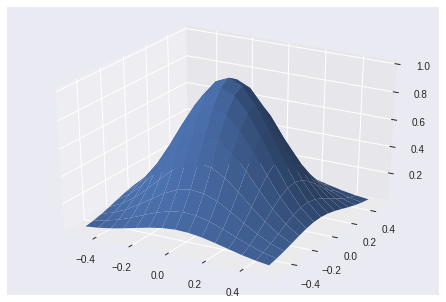

In [0]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_surface(xgrid, ygrid, zgrid_train)

In [0]:
def create_net(amount_of_hidden_units):
    net = NeuralNetPro()
    net.add_input_layer(N)
    net.add(amount_of_hidden_units, net.sigmoid)
    net.add_output_layer(1, net.linear)
    net.compile()
    net.set_train_type('prediction')
    net.set_random_matrixes()
    dim = net.return_unroll_dim()
    return net, dim

In [0]:
def cost(params):
    net.roll_matrixes(params)
    return net.calculate_cost(x_train, y_train)

In [0]:
net, dim = create_net(10)
net.calculate_cost(x_train, y_train)

0.3969619719143749

In [0]:
nm = NelderMead()

In [0]:
amount_of_hidden_units = 10
exit_code = -1
cost_function = -1
i = 0
while exit_code != 0:
    del net
    net, dim = create_net(amount_of_hidden_units)
    res = nm.optimize(cost, dim, 600000, alpha=0.3, min_cost=2e-4)
    exit_code = res.exit_code
    cost_function = res.cost_function
    clear_output()
    print(i)
    print(res)
    amount_of_hidden_units += 1
    i += 1

0
Is converge: True
Amount of iterations: 42991
Reached function value: 0.0038728586623223422
Reason of break: Local minimum reached



..

KeyboardInterrupt: ignored

In [0]:
net.roll_matrixes(res.x)
cost_list = res.cost_list

In [0]:
net.calculate_cost(x_train, y_train)

0.00019968577334684187

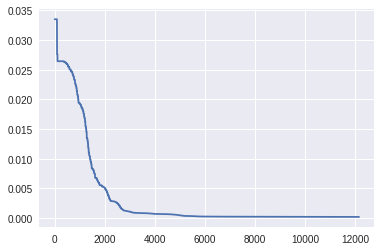

In [0]:
plt.plot(cost_list)

In [0]:
cost_array = numpy.array(cost_list)

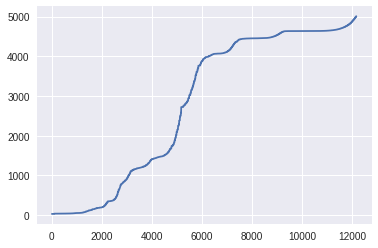

In [0]:
plt.plot(cost_array ** (-1))

In [0]:
net.run([[0], [0]])

array([[0.99269495]])

In [0]:
y_pred = net.run(x_train)

In [0]:
zgrid = y_pred.reshape((amount_of_points, amount_of_points))

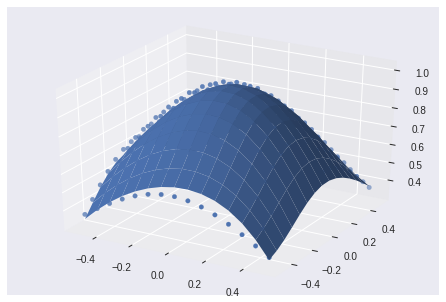

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(x_train[0], x_train[1], y_pred, marker='x')
ax.plot_surface(xgrid, ygrid, zgrid)
ax.scatter(x_train[0], x_train[1], y_train)

In [0]:
A_matrix

array([[ 9.62925385, -0.99650135],
       [-0.99650135,  3.64790663]])

In [0]:
import time
dot_str = '.'
for i in range(100):
    if (i % 10) == 0:
        if (i % 40) == 0:
          dot_str = ''
          sys.stderr.write('\r' + '    ')
        dot_str += '.'
        sys.stderr.write('\r' + dot_str)
    time.sleep(.1)

..